# **The Brachistochrone Problem**


The brachistochrone problem was proposed by Johann Bernoulli in 1696 and can 
be solved using optimal control arguments (Pontryagin's maximum principle). 
The problem consists of finding a curve connecting two points $A = (0, 0)$ and 
$B = (z_B , y_B )$, $z_B > 0$, $y_B > 0$, on a vertical plane $(z, y)$ such 
that a particle starting from $A$ and sliding without friction along this curve 
reaches $B$ in minimum time. The y-axis is aligned with gravity. The optimal 
solution is given by

$$(y, z) = c(\theta  - \sin(\theta ), 1 - \cos(\theta )),\, \theta \, \in  
\, [0, \overline\theta ̄]$$

where $c$ and $\overline{\theta}$ can be picked such that $y(\overline{\theta})$, 
$z(\overline{\theta})$ $= (y_B ,\, z_B)$. This optimal solution is shown in 
the red line in Figure 1 for given parameters. The goal of this assignment is 
to find an approximate solution (such as the one shown in blue in Figure 1) 
using a discretization approach and applying dynamic programming. The considered 
curves, denoted by $p(z)$, are continuously diferentiable cubic splines, obtained 
by concatenating third order polynomials, denoted by $p_k(z)$, defined in segments 
$z \in [z_k ,\, z_{k+1}]$, $z_k =k\frac{ z_B}{h}$ ,  $k \in  \{0, 1, . . . , 
h - 1\}$, $z_h = z_B$ and imposing that $p(z_k)$ and $p{\prime}(z_k)$ belong 
to finite sets.  These curves can then be specifed by $p(z) \in  C$ , where $\mathcal{C}:=\left\{p_{0}(z) \mathbf{1}_{\left[z_{0}, z_{1}\right]}+\sum_{k=1}^{h-1} p_{k}(z) \mathbf{1}_{\left(z_{k}, z_{k+1}(z)\right.} |R_1,R_2,R_3, R_4 \text{ hold }\}\right.$

where

$$ R_1 \rightarrow p_{k}(z)=a_{k}+b_{k}\left(z-z_{k}\right)+c_{k}\left(z-z_{k}\right)^{2}+d_{k}\left(z-z_{k}\right)^{3}$$

$$R_2 \rightarrow  p_{0}(0)=0, p_{h-1}\left(z_{B}\right)=y_{B} $$

$$R_3 \rightarrow p_{k}\left(z_{k+1}\right)=p_{k+1}\left(z_{k+1}\right), p_{k}^{\prime}\left(z_{k+1}\right)=p_{k+1}^{\prime}\left(z_{k+1}\right) 
$$

$$R_4 \rightarrow p_{k}\left(z_{k}\right) \in\left\{\ell \frac{\bar{y}}{L} 
| \ell \in \mathcal{L}\right\}, p_{k}^{\prime}\left(z_{k}\right) \in\left\{\tan 
\left(\frac{\pi}{2(R+1)} r\right) | r \in \mathcal{R}\right\}$$

and $\mathcal{L}:=\{0,1,...,L\}$, $\mathcal{R}:=\{-R, -R + 1, . . . , -1, 
0, 1, . . . R\}$, for a given $\overline{y}\, >\, y_B\, ;\, 1_{[a,b]}(z)$equals 
one if $z\, \in [a,b]$and zero otherwise. It is convenient to define $\mathcal{n}:=\, (2R+1)(L+1)$ $\mathbb{L}$ and the map $\mathcal{X}:\, \mathcal{L} \, x\, \mathcal{R}\, \rightarrow \, \{1,2,...n\}\, .\, (l,r)\, \rightarrow \, 1+R+r+l(2R+1)$. 
Denoting $m$, $\upsilon$ and $g$, the mass, velocity and gravity constant, respectively, using the Conservation of Energy Principle we obtain

$$\frac{1}{2}m\upsilon ^2\, =\, mgy\, , \quad g=9.81$$

so that the velocity is a function of $y$, as it is shown below

$$\upsilon \, = \,  \sqrt{2gy}$$

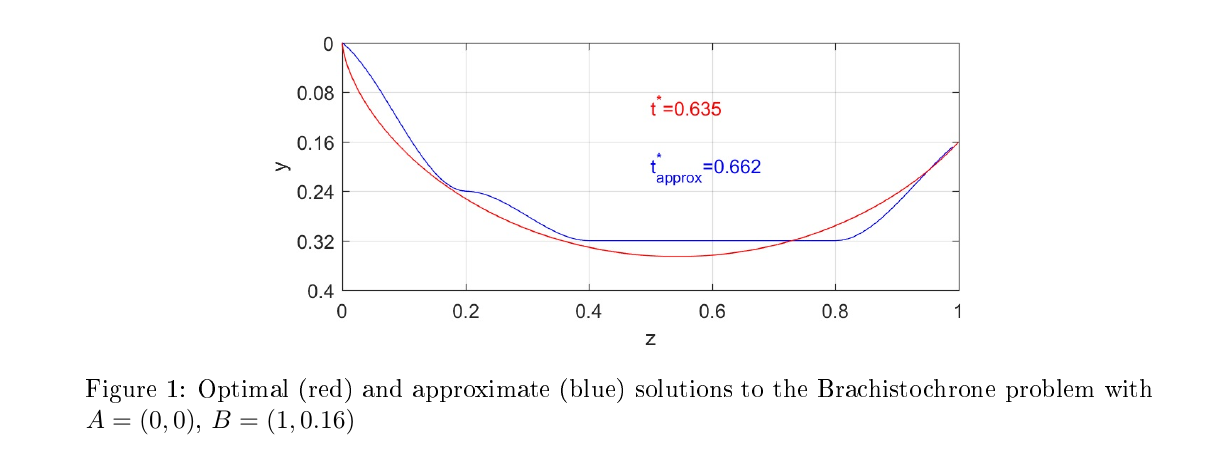

The time it takes for the ball to move from a point $C = (z_C , y(z_C))$ to 
a point $D = (z_D , y(z_D ))$, along a curve $y(z)$ is then

$$t(z_C,\, z_D,\, y)\, = \, \int _{z_C}^{z_D}\, \frac{\sqrt{1+(y{\prime})^2}}{\upsilon (y(z))} dz$$

This live script finds the optimal solution $p$ to the problem stated above, 
which can now be stated as follows.

$$\min\, t(0,z_B,p), \quad p \, \in\, C$$

In order to find such a solution the problem is broken down in four tasks 
corresponding to each of the following functions.

A) The function `u, J = dp(M,C,Jh,h)`, which solves a discrete optimization 
problem of the following form

$$\min\, \sum _{k=0}^{h-1}\, g(xk,u_k)\, +\, g_h(x_h)$$

$$ \text{subject to } x_{k+1}\, =\, f(x_k,u_k)$$

where $k\,\in\, K\,\,\, :\, = \,\, \{1,2,...,h-1\}$, $x_k\,\, \in \,\, X\,\,\, 
:\, =\,\{1,2,...,n\}$, for $ k \, \in \, K \cup \{h\}$ and $u_k\,\, \in \,\, 
U_K\,\,\, :\, =\,\{1,2,...,m\}$ for $ k \, \in \, K$.

The inputs of the function are: 

1) The $n\, x\, m$ M matrix such that $M(i,j)\, = \, f(i,j)$;  

2) The $n\, x\, m$ C matrix such that $C(i,j)\, = \, g(i,j)$;

3) The $J_h$ vector such that $J_h(i)\, = \, g_h(i)$, $i\in \, X_h$;

4) The number of stages $h$.

Τhe output arguments are:

1) $J - n \, \times\, h$ matrix such that $J(i, k + 1)$ is the costs-to-go 
at stage $k,\, k \, \in \, K \cup \{h\}$, and state $i$;

2) $u - n \, \times \, h$ matrix such that $u(i, k + 1)$ is the optimal action 
with the smallest index $j$ (in case there are more than one optimal actions) 
for each stage $k,\, k \, \in \, K$, and state $i$.

B) The function `M, C, Jh = formulatebrachistochronedp(yB,zB,L,R,h,ybar)`, 
which provides the matrices $M$, $C$, and $J_h$, as given above, of the dynamic 
programming problem specified by $x_k = \mathcal{X}(i,j)\, \in\, \{1,2,...,n\}$, 
if $p(z_k) = i_k\frac{\overline {y}}{L}$, and $p{\prime}(z_k) = \tan ({\frac{\pi}{2(R+1)}j_k})$, 
the dyamic model

$$f(x_k,u_k)=u_k,$$

the cost function 

$$g(x_k,u_k)\, = \, t(z_k,\, z_{k+1}, p_3)$$

where $p_3$ is the unique $3rd$ order polynomial such that 

$p_3(z_k) = i_k\frac{\overline {y}}{L}$,  $p_3{\prime}(z_k) = \tan ({\frac{\pi}{2(R+1)}j_k})$, $(i_k,\, j_k)\,\, =\,\, \mathcal{X}^{-1}(x_k)$

$p_3(z_{k+1}) = i_{k+1}\frac{\overline {y}}{L}$, $p_3{\prime}(z_{k+1}) = \tan ({\frac{\pi}{2(R+1)}j_{k+1}})$,  $(i_{k+1},\, j_{k+1})\,\, =\,\, \mathcal{X}^{-1}(u_k)$

and the terminal cost

$$ J_h(x)= \left\{\begin{array}{ll}      0, & if \, \mathcal{X} ^{-1}(x)\, 
= \, (i,\, b)\quad \text{and} \quad y_B=i\frac{\overline{y}}{L}\quad for\, some\, 
b\\      \infty ,& otherwise \\\end{array} \right. $$

for the input parameters $y_B, \,\, z_B, \,\, L,\,\, R, \,\, h,\,\, \overline{y}$. 
This function in order to work requires another function timepoly3int which 
is desribed below. 

C) The function `[t,coef] = timepoly3int(z0,y0,dy0,z1,y1,dy1)` is an auxiliary 
function (used in `formulatebrachistochronedp`, `getoptimalpath`), providing 
the coeficients coef=[a b c d] of the unique polynomial

$$p_3(z)\, =\, a+b(z-z_0)+c(z-z_0)^2+d(z-z_0)^3$$

such that the following holds 

$$p_3(z_0)\quad = \quad y_0 , \quad \overline{p}_3 (z_0)\, =\,\, dy_0$$

$$p_3(z_1)\quad = \quad y_1 , \quad \overline{p}_3 (z_1)\, =\,\, dy_1$$

and the time $t$ taken for the ball to move from point $(z_0, y_0)$ to point $(z_1, y_1)$ along this path.

D) Finally, the function `zplot, yplot, toptapprox = getoptimalpath(u,J,yB,zB,L,R,P,ybar)`
outputs $P + 1$ evenly spaced points ( $\overline{z}_k = k\frac{z_B}{L}$, $k\,\, \in \,\, \{0,1,...,P\}$), of the optimal solution p to the problem (2), 
where $\text{zplot} = [\overline{z}_0,\,\, \overline{z}_1,\,\,\overline{z}_2,,,,\,\,\overline{z}_P]$,$\text{yplot} = [p(\overline{z}_0),\,\, p(\overline{z}_1),\,\, p(\overline{z}_2),,,,\,\, p(\overline{z}_P)]$, 
based on the output of the dynamic programming algorithm $u$, $J$ and the input 
parameters as defined above. Moreover, it also output toptapprox, which is the 
optimal value of the solution to the problem (2) (time to travel from A to B).

These functions are combined in the following script which provides the desired optimal solution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [ ]:
def timepoly3int(x0, y0, dy0, x1, y1, dy1):
    a = y0
    b = dy0
    dx = x1 - x0
    cd = np.array([[3 / dx ** 2, - 1 / dx], [-2 / dx ** 3, 1 / dx ** 2]]) @ \
        np.array([[y1 - y0 - dy0 * dx], [dy1 - dy0]])
    c = cd[0, 0]
    d = cd[1, 0]

    w_ = x0 + np.concatenate([np.arange(0.0001, 0.0011, 0.0001), np.arange(1, 100, 1) / 100]) * (x1 - x0)
    vx = np.sqrt(2 * 9.81 * y0) / (1 + dy0 ** 2)

    if np.all(a + b * (w_ - x0) + c * (w_ - x0) ** 2 + d * (w_ - x0) ** 3 > 0):  # and c > 9.81 / (2 * vx ** 2))
        f = lambda w: np.sqrt(1 + (b + 2 * c * w + 3 * d * w ** 2) ** 2) / \
            np.sqrt(2 * 9.81 * (a + b * w + c * w ** 2 + d * w ** 3))  # w = x1-x0
        t = integrate.quad(f, 1e-6, dx - 1e-6)[0]

    else:
        t = np.inf

    coef = [a, b, c, d]

    return t, coef

In [ ]:
def formulatebrachistochronedp(y, z, L, R, h, Y):
    deltaz = z / h
    deltay = Y / L

    yvec = np.arange(0, L + 1, 1) * deltay
    iy = np.argmin(abs(yvec - y))

    thetavec = np.pi / 2 * np.arange(-R, R + 1, 1) / (R + 1)
    R2 = (2 * R + 1)
    C = np.zeros([(L + 1) * R2, (L + 1) * R2])
    M = np.zeros([(L + 1) * R2, (L + 1) * R2])
    indT = 1
    for indy in range(0, L + 1):
        for indtheta in range(0, R2):
            for induy in range(0, L + 1):
                for indutheta in range(0, R2):
                    output = timepoly3int(0, yvec[indy], np.tan(
                        thetavec[indtheta]), deltaz, yvec[induy], np.tan(thetavec[indutheta]))[0]
                    C[indy * R2 + indtheta, induy * R2 + indutheta] = output
                    M[indy * R2 + indtheta, induy * R2 + indutheta] = induy * R2 + indutheta + 1
                    indT = indT + 1
    Jh = np.inf * np.ones([(L + 1) * R2, 1])
    Jh[range(1 + iy * R2 - 1, (iy + 1) * R2)] = 0

    return M, C, Jh

In [ ]:
def dp(M, C, Jh, h):
    n = M.shape  # state and input dimension
    J = Jh[:, 0]

    J_ = np.zeros([n[0], h])
    u_ = np.zeros([n[0], h])

    ind = np.arange(0, n[1]) + 1

    for k in range(h - 1, -1, -1):
        for i in range(0, n[0]):
            M.astype(int)
            J_[i, k] = np.min(C[i, :] + J[M[i, :].astype(int) - 1])
            c = ind[J_[i, k] == (C[i, :] + J[M[i, :].astype(int) - 1])]
            u_[i, k] = c[0]
        J = J_[:, k]

    return u_, J_

In [ ]:
def getoptimalpath(u, J, y, z, L, R, P, Y):
    h = u.shape[1]
    deltaz = z / h
    deltay = Y / L
    yvec = np.arange(0, L) * deltay
    R2 = 2 * R + 1
    thetavec = np.pi / 2 * np.arange(-R, R + 1, 1) / (R + 1)
    topt = np.min(J[range(0, R2), 0])
    ind0 = np.argmin(J[range(0, R2), 0]) + 1 

    optind = np.zeros([h + 1])
    opttheta = np.zeros([h + 1])
    opty = np.zeros([h + 1])
    optind[0] = ind0 
    opttheta[0] = thetavec[((optind[0] - 1) % R2).astype(int)]
    opty[0] = yvec[np.ceil((optind[0] / R2) - 1).astype(int)]

    for k in range(0, h):
        optind[k + 1] = u[(optind[k] - 1).astype(int), k]
        opttheta[k + 1] = thetavec[((optind[k + 1] - 1) % R2).astype(int)]
        opty[k + 1] = yvec[(np.ceil(optind[k + 1] / R2) - 1).astype(int)]

    P_ = P / h
    w_ = np.arange(0, P_ - 1 + 1) / P_ * deltaz
    zplot = []
    yplot = []
    for k in range(0, h):
        [t, coef] = timepoly3int((k - 1) * deltaz, opty[k], opttheta[k], k * deltaz, opty[k + 1], opttheta[k + 1])
        a = coef[0]
        b = coef[1]
        c = coef[2]
        d = coef[3]
        yplot = np.append(yplot, a + b * w_ + c * w_ ** 2 + d * w_ ** 3)
        zplot = np.append(zplot, k * deltaz + w_)

    zplot = np.append(zplot, z)
    yplot = np.append(yplot, y)
    return zplot, yplot, topt

In [ ]:
yB = 0.16
zB = 1
L = 5
R = 1
h = 5
P = 20
ybar = 0.4

M, C, Jh = formulatebrachistochronedp(yB, zB, L, R, h, ybar)
u, J = dp(M, C, Jh, h)
zplot, yplot, toptapprox = getoptimalpath(u, J, yB, zB, L, R, P, ybar)

plt.plot(zplot, yplot)
plt.gca().invert_yaxis()